<a href="https://colab.research.google.com/github/3ndung/H8_PTP_Final_Image/blob/master/CatDog_Classification_with_preTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CATS AND DOGS IMAGE CLASSIFICATION**





---

A Final Project of Machine Learning Class 

---

**Add DatastetFrom Kaggle dan atau google dataset**

---




In [0]:
! mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [28]:
!kaggle competitions download -c dogs-vs-cats

 96% 260M/271M [00:01<00:00, 161MB/s]
100% 271M/271M [00:01<00:00, 152MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.0MB/s]
 98% 535M/543M [00:02<00:00, 184MB/s]
100% 543M/543M [00:02<00:00, 198MB/s]


In [0]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as zipObj:
   zipObj.extractall('train')

with ZipFile('test1.zip', 'r') as zipObj:
   zipObj.extractall('test')  

**or you can download from link below**

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# **Import Tensorflow & other library**

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
tf.__version__

In [0]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# Set Image Size

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [0]:
filenames = os.listdir("train/train/")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
       

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [35]:
df.head(10)

,filename,category
0,cat.2910.jpg,0
1,cat.3176.jpg,0
2,cat.6647.jpg,0
3,dog.1106.jpg,1
4,cat.6265.jpg,0
5,dog.4551.jpg,1
6,dog.7839.jpg,1
7,dog.2445.jpg,1
8,dog.8166.jpg,1
9,cat.3050.jpg,0


In [36]:
df.tail(10)

,filename,category
24990,cat.3502.jpg,0
24991,dog.32.jpg,1
24992,dog.6114.jpg,1
24993,cat.8638.jpg,0
24994,cat.6340.jpg,0
24995,cat.1896.jpg,0
24996,dog.7575.jpg,1
24997,dog.5887.jpg,1
24998,cat.6288.jpg,0
24999,cat.1945.jpg,0


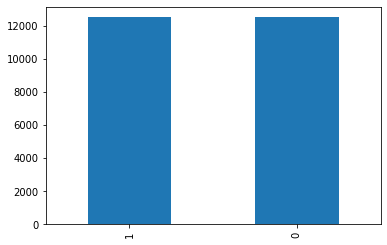

In [37]:
df['category'].value_counts().plot.bar()

# Set Directory for Training/Learning

In [0]:
PTH = 'train/train/'

**Take Some sample Image**

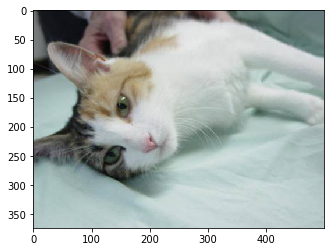

In [39]:
import random

sample = random.choice(filenames)
image = tf.keras.preprocessing.image.load_img(PTH+sample)
plt.imshow(image)

# **Model with 3 Blocks Convolutional**

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding="same", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
    
    
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)      

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# **Reduce Learning Rate ON Plateu**

The main purpose of Reduce Learning Rate on Plateu is to avoid saturation in Optimizer, and avoid over training 


In [0]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

# **Make Train & Test Datasets**



In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

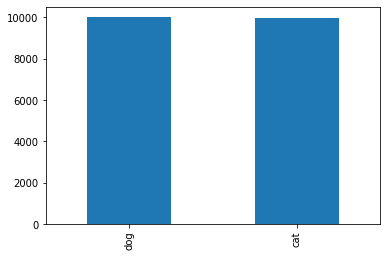

In [0]:
train_df['category'].value_counts().plot.bar()

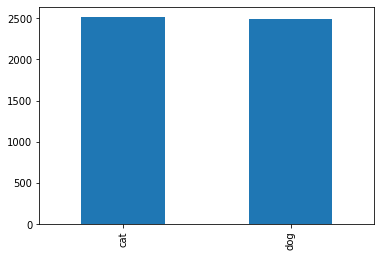

In [0]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# **Augmentation Image**

We use, Augmentation to create some new image by spliting, zoooming, flipping and so on

In [46]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [47]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [48]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


# **Sample result of image with augmentation**

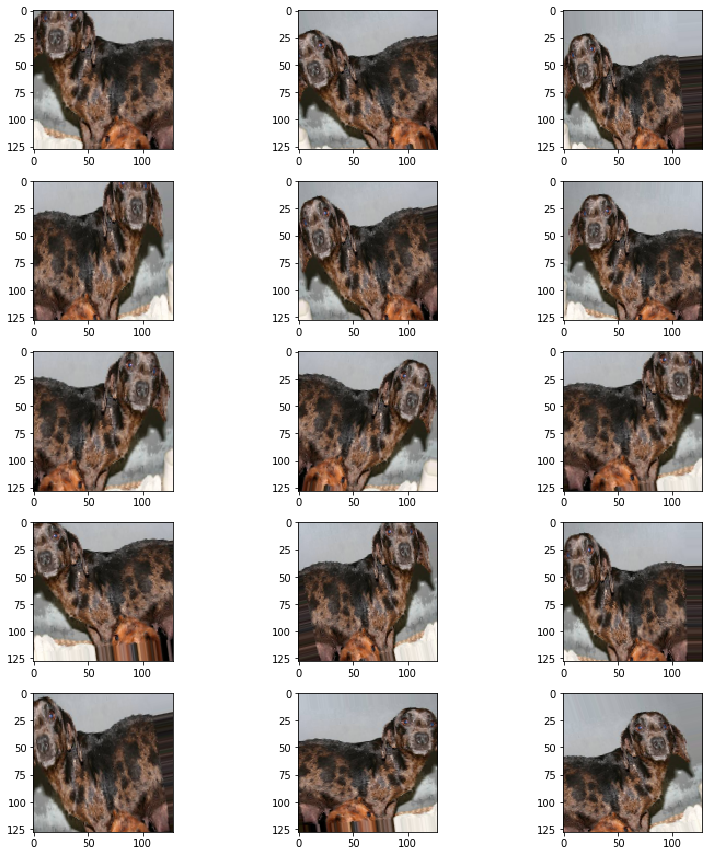

In [50]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# **Let's Train**

In [0]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    #epochs=epochs,
    epochs= 50,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1333 steps, validate for 333 steps
Epoch 1/50
1333/1333 [==============================] - 156s 117ms/step - loss: 0.6967 - accuracy: 0.5356 - val_loss: 0.6892 - val_accuracy: 0.5115
Epoch 2/50
1333/1333 [==============================] - 149s 112ms/step - loss: 0.6651 - accuracy: 0.5911 - val_loss: 0.6282 - val_accuracy: 0.6382
Epoch 3/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.6249 - accuracy: 0.6493 - val_loss: 0.5957 - val_accuracy: 0.6811
Epoch 4/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.5773 - accuracy: 0.6973 - val_loss: 0.5075 - val_accuracy: 0.7542
Epoch 5/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.5426 - accuracy: 0.7249 - val_loss: 0.4920 - val_accuracy: 0.7602
Epoch 6/50
1333/1333 [==============================] - 150s 112ms/step - loss: 0.5189 - 

#**SAVE MODEL**

In [0]:
model.save('MODEL_BAGUS_13022020_valacc_08865.h5')

# **Plotting Learning & Training**

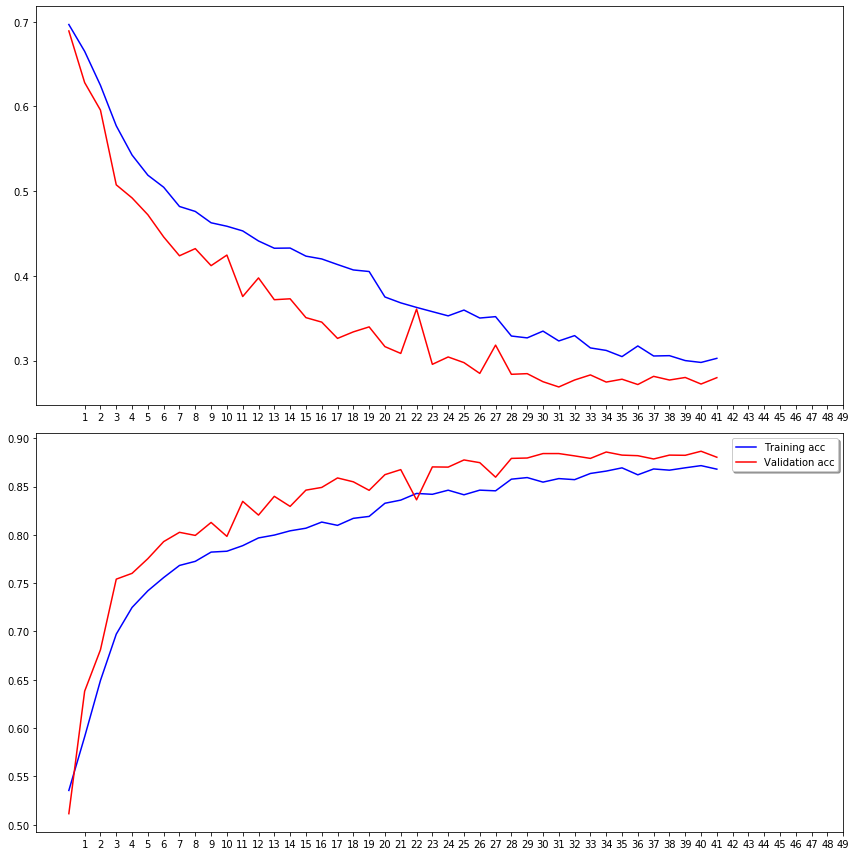

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Re-Continue Training/Learning

on Tensorflow, there is a featuret to continue Training with last value of accuracy, losses 

In [0]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    #epochs=epochs,
    epochs= 5,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1333 steps, validate for 333 steps
Epoch 1/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3667 - accuracy: 0.8363 - val_loss: 0.3884 - val_accuracy: 0.8288
Epoch 2/5
1333/1333 [==============================] - 147s 111ms/step - loss: 0.3694 - accuracy: 0.8354 - val_loss: 0.4025 - val_accuracy: 0.8240
Epoch 3/5
1333/1333 [==============================] - 147s 111ms/step - loss: 0.3626 - accuracy: 0.8369 - val_loss: 0.3889 - val_accuracy: 0.8296
Epoch 4/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3642 - accuracy: 0.8351 - val_loss: 0.3936 - val_accuracy: 0.8286
Epoch 5/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3708 - accuracy: 0.8340 - val_loss: 0.3980 - val_accuracy: 0.8270


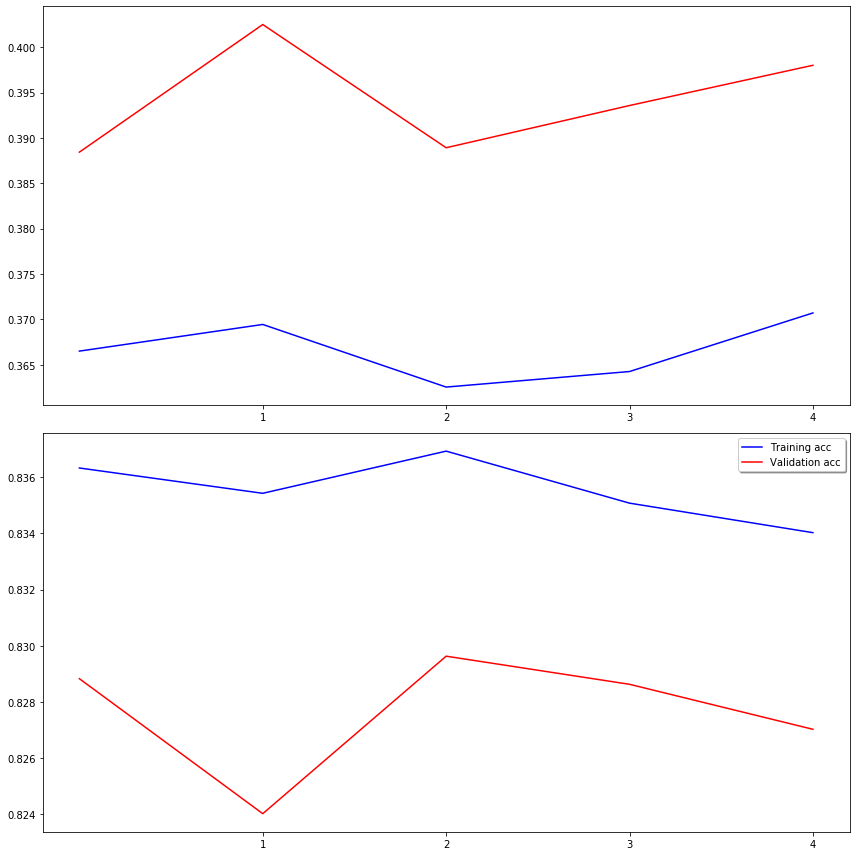

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

epochs=5
ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
test_filenames = os.listdir("/content/drive/My Drive/DOG_N_CAT/cats_and_dogs_filtered/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/DOG_N_CAT/cats_and_dogs_filtered/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# **LET'S MAKE SOME PREDICTION**

**Make Prediction Function**

In [0]:
def prediksi_semua(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

# **RANDOM PREDICTION IMAGE of "KOECENG OR ANJENG" :D**

*its okay to add some joke :p
and you can re-run cell below as many as you want

 IMAGE ---->> 2209.jpg


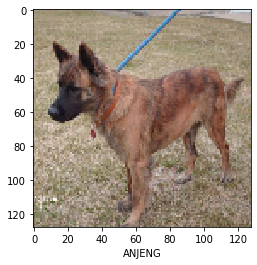

In [0]:
PTHC = 'test/test1/'
sample = random.choice(os.listdir(PTHC))

print(' IMAGE ---->> {}'.format(sample))

A = 'test/test1/{}'.format(sample)
#B = 'test/test1/10007.jpg'


prediksi_semua(A)
      

# **Prediction with image from Internet**

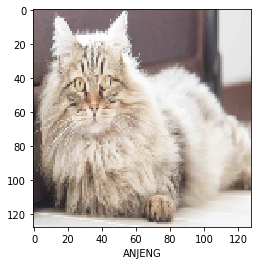

In [0]:
import urllib.request as req
import random

A ='https://cdn.shopify.com/s/files/1/0997/4496/files/Screen_Shot_2018-08-28_at_3.11.32_PM_grande.png?v=1535494311'

f = open('IMG_FROM_URL.jpg','wb')
f.write(req.urlopen(A).read())
f.close()

prediksi_semua('IMG_FROM_URL.jpg')

*The Result above is not correct , but we will fix it on the Learning with pretrain on next section, and you can compare or summary the impact of validation of accuracy 

# **Predition with re-use model**

on the section below , we re-use our model 
with load_model

In [0]:
model_load = tf.keras.models.load_model('MODEL_BAGUS_13022020_valacc_0829.h5')


def prediksi_Dengan_Model(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model_load.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

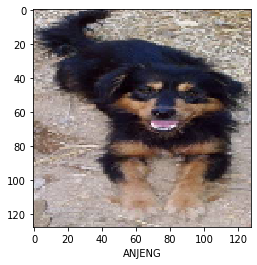

In [0]:
prediksi_Dengan_Model(A)

------------------------------------------------------------------------------------------------------------------------------------------------------

# **LEARN WITH PRE-TRAIN**


In this section, we will use application feature that has provide by Tensorflow. The Application feature allow us to re-use some proven model & model_weight 

we will re-use VGG16 model and weight by called it application



# **Let's Call Tensoflow Datasets**
but 1st lets call tfds since we need load fast datasets from tensorflow 

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

##**Make train, test & Validasi Datasets**

In [0]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete7DY8JI/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


##**Get some sample of datasets**

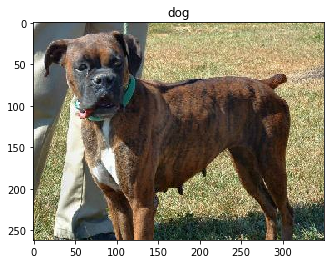

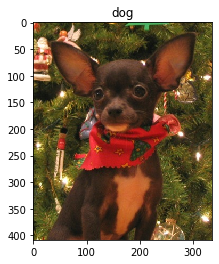

In [0]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

##**Normalization our datasets images**

In [0]:
def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/155) - 1
  image = tf.image.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [0]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 128, 128, 3])

## **Call Application VGG16 feature**



# 1. Base Model

In [0]:
IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 512)


In [0]:
base_model.trainable = False

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

# **2. Global Average Pooling**

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


## **3. Output Layers/ Prediction Layers**

In [0]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


# **Combine Base Model, Global Average Pooling Layer & Output Layers into one model**



In [0]:
model_VGG16 = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

from above, the model looks simple that pervious 3 block convo model

# Set Compiler attribute & Learning rate 

In [0]:
base_learning_rate = 0.0001
model_VGG16.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model_VGG16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
len(model_VGG16.trainable_variables)

2

In [0]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model_VGG16.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 1s 70ms/step - loss: 0.8209 - accuracy: 0.5188


In [0]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.82
initial accuracy: 0.52


# **Train our Model**

In [0]:
history = model_VGG16.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 43s 74ms/step - loss: 0.2249 - accuracy: 0.8999 - val_loss: 0.2308 - val_accuracy: 0.8925
Epoch 2/10
582/582 [==============================] - 45s 78ms/step - loss: 0.2239 - accuracy: 0.9003 - val_loss: 0.2299 - val_accuracy: 0.8912
Epoch 3/10
582/582 [==============================] - 46s 78ms/step - loss: 0.2227 - accuracy: 0.9010 - val_loss: 0.2290 - val_accuracy: 0.8934
Epoch 4/10
582/582 [==============================] - 43s 74ms/step - loss: 0.2218 - accuracy: 0.9016 - val_loss: 0.2282 - val_accuracy: 0.8942
Epoch 5/10
582/582 [==============================] - 44s 75ms/step - loss: 0.2210 - accuracy: 0.9020 - val_loss: 0.2274 - val_accuracy: 0.8942
Epoch 6/10
582/582 [==============================] - 44s 76ms/step - loss: 0.2199 - accuracy: 0.9025 - val_loss: 0.2267 - val_accuracy: 0.8934
Epoch 7/10
582/582 [==============================] - 46s 79ms/step - loss: 0.2190 - accuracy: 0.9024 - val_loss: 0.2260 - val_accuracy:

# **SAVE MODEL**

Save our model, with best Val_accuracy. Since we know we will re-use the model in feature

In [0]:
model_VGG16.save('/content/drive/My Drive/DOG_N_CAT/BAGUS_VGG16_val_acc08968.h5')

# Plotting Model Train 

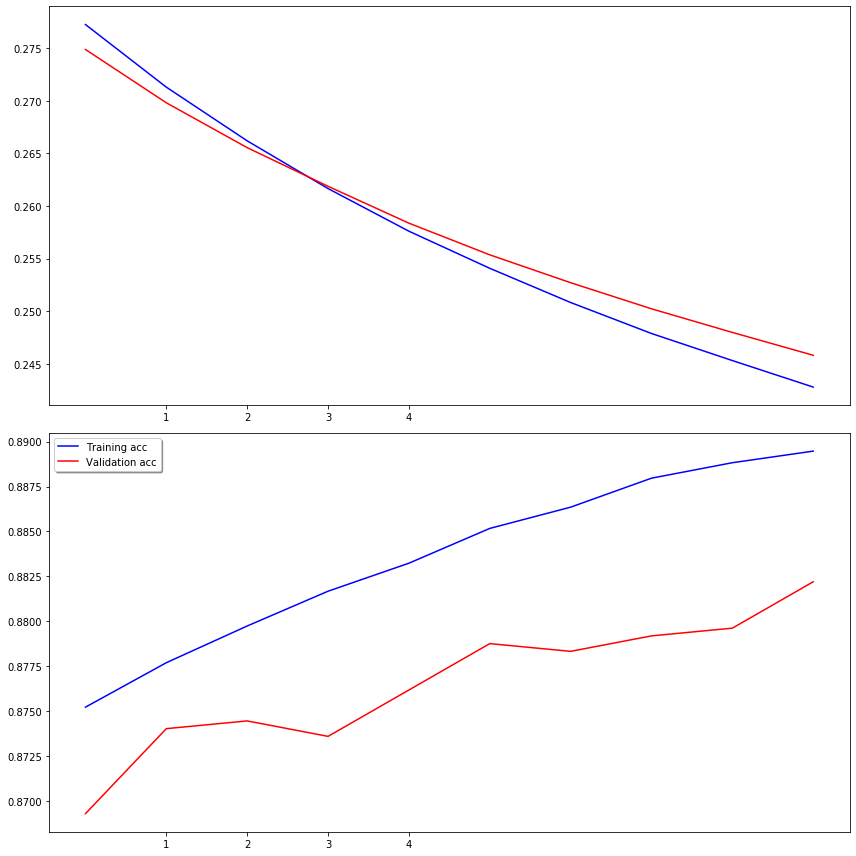

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

epochs=5
ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()



In [0]:

model_load = tf.keras.models.load_model('/content/drive/My Drive/DOG_N_CAT/BAGUS_VGG16_val_acc08968.h5')


def prediksi_Dengan_Model(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  #plt.subplot(3,2,1)
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model_load.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

# **Make Some Prediction with re-use model**

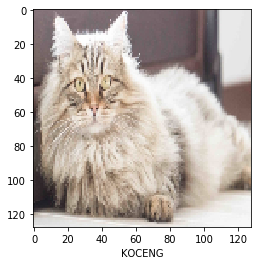

In [0]:
import urllib.request as req
import random

A ='https://cdn.shopify.com/s/files/1/0997/4496/files/Screen_Shot_2018-08-28_at_3.11.32_PM_grande.png?v=1535494311'

f = open('IMG_FROM_URL.jpg','wb')
f.write(req.urlopen(A).read())
f.close()

prediksi_Dengan_Model('IMG_FROM_URL.jpg')

remember in previous train with 3 block convo, the prediction of image return wrong prediction , but here it's return the right prediction

hence we can assume benefit of hight val_accuracy to predict the input *in this case we use image

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **LEARN WITH T-HUB**

In [0]:
import tensorflow_hub as hub

# **Make Model with T-HUB**

In [0]:
inception_url = "https://tfhub.dev/google/efficientnet/b1/classification/1"


model_thub = tf.keras.Sequential([
    hub.KerasLayer(inception_url, trainable=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)),
    tf.keras.layers.Dense(256, activation="elu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [53]:
model_thub.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1000)              7856232   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 8,113,002
Trainable params: 256,770
Non-trainable params: 7,856,232
_________________________________________________________________


In [0]:
model_thub.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [60]:
epochs = 5
history = model_thub.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 1334 steps, validate for 334 steps
Epoch 1/5
1334/1334 [==============================] - 137s 103ms/step - loss: 0.0716 - accuracy: 0.9751 - val_loss: 0.0943 - val_accuracy: 0.9740
Epoch 2/5
1334/1334 [==============================] - 138s 103ms/step - loss: 0.0673 - accuracy: 0.9763 - val_loss: 0.1030 - val_accuracy: 0.9712
Epoch 3/5
1334/1334 [==============================] - 137s 103ms/step - loss: 0.0591 - accuracy: 0.9798 - val_loss: 0.1058 - val_accuracy: 0.9732
Epoch 4/5
1334/1334 [==============================] - 137s 103ms/step - loss: 0.0607 - accuracy: 0.9790 - val_loss: 0.1107 - val_accuracy: 0.9710
Epoch 5/5
1334/1334 [==============================] - 137s 103ms/step - loss: 0.0530 - accuracy: 0.9818 - val_loss: 0.1258 - val_accuracy: 0.9688


In [0]:
model_thub.save('/content/drive/My Drive/DOG_N_CAT/BAGUS_EFFICIENET_val_acc09688.h5')

In [74]:
model_load = tf.keras.models.load_model('/content/drive/My Drive/DOG_N_CAT/BAGUS_EFFICIENET_val_acc09688.h5')


def prediksi_Dengan_Model(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model_load.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

ValueError: ignored

In [73]:
import glob

aglob = glob.glob('/content/test/test1/*.jpg')
model_load = tf.keras.models.load_model('/content/drive/My Drive/DOG_N_CAT/BAGUS_EFFICIENET_val_acc09688.h5')

for i in range(len(aglob)):
  if i < 6:
    print(aglob[i])
    plt.figure(figsize=(12,12))
    plt.subplot(3,2,i+1)


/content/test/test1/240.jpg
/content/test/test1/11667.jpg
/content/test/test1/11052.jpg
/content/test/test1/3109.jpg
/content/test/test1/3188.jpg
/content/test/test1/5577.jpg


In [0]:



plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()